Avvik for de forskjellige metodene
Paneler: 2 Trap 0.0131146313	Midpoint 0.0065368909	Simpsons 1.36165e-05
Paneler: 3 Trap 0.0058421579	Midpoint 0.0029170278	Simpsons 2.7008e-06
Paneler: 4 Trap 0.0032888702	Midpoint 0.0016431514	Simpsons 8.558e-07
Paneler: 5 Trap 0.0021056652	Midpoint 0.0010523064	Simpsons 3.508e-07
Paneler: 6 Trap 0.0014625651	Midpoint 0.0007310287	Simpsons 1.692e-07
Paneler: 7 Trap 0.0010746695	Midpoint 0.0005371977	Simpsons 9.14e-08
Paneler: 8 Trap 0.0008228594	Midpoint 0.0004113494	Simpsons 5.36e-08
Paneler: 9 Trap 0.000650196	Midpoint 0.0003250478	Simpsons 3.34e-08
Paneler: 10 Trap 0.0005266794	Midpoint 0.0002633068	Simpsons 2.19e-08
Paneler: 11 Trap 0.0004352848	Midpoint 0.0002176199	Simpsons 1.5e-08


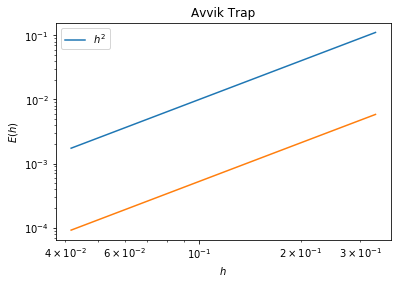

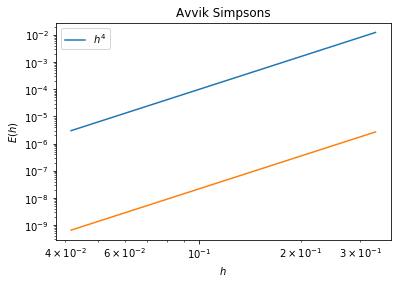

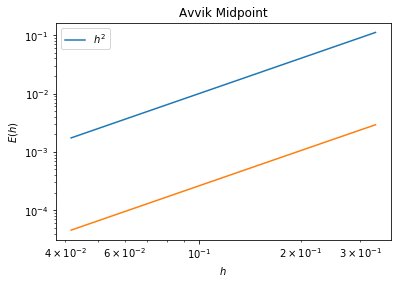

In [38]:
import numpy as np
import matplotlib.pyplot as plt

def Trap(a,b,f):
    return 0.5*(b-a)*(f(a)+f(b))

def Simpsons(a,b,f):
    h = (b-a)/2
    return (h/3)*(f(a)+4*f(a+h)+f(b))

def Midpoint(a,b,f):
    return (b-a)*f((a+b)/2)

#Composite formler, bruker bare integrasjonsmetoden på hvert delintervall
#kan evt. bruker de oppgitte Composite formlene i boka
def Composite_NC(a,b,f,n, method):
    sum = 0
    h = (b-a)/n
    for i in range(n):    
        sum += method(a+i*h, a+(i+1)*h, f)
    return sum
    
def f(x):
    return np.exp(-x)  #Integral over (0,1) = 1-e^-1 = 0.6321205588

Integral = 1-np.exp(-1)
print("Avvik for de forskjellige metodene")
for i in range(2,12):
    s = "Paneler: " + str(i)
    s += " Trap " + str(round(abs(Composite_NC(0,1,f,i,Trap)-Integral),10))
    s += "\tMidpoint " + str(round(abs(Composite_NC(0,1,f,i,Midpoint)-Integral),10))
    s += "\tSimpsons " + str(round(abs(Composite_NC(0,1,f,i,Simpsons)-Integral),10))
    print(s)

def plot_avvik(a, b, n_list, f, method): #n_list = antall paneler, må være heltall
    e_list = np.zeros(len(n_list))
    h_list = np.zeros(len(n_list))
    if method == "Simpsons":
        for i in range(len(n_list)):
            e_list[i] = abs(Composite_NC(a,b,f,n_list[i],Simpsons)-Integral)
            h_list[i] = (b-a)/n_list[i]
        plt.plot(h_list,h_list**4, label=r'$h^4$')
    elif method == "Trap":
        for i in range(len(n_list)):
            e_list[i] = abs(Composite_NC(a,b,f,n_list[i],Trap)-Integral)
            h_list[i] = (b-a)/n_list[i]
        plt.plot(h_list,h_list**2, label=r'$h^2$')
    else:
        for i in range(len(n_list)):
            e_list[i] = abs(Composite_NC(a,b,f,n_list[i],Midpoint)-Integral)
            h_list[i] = (b-a)/n_list[i]
        plt.plot(h_list,h_list**2, label=r'$h^2$')
    plt.plot(h_list, e_list)
    plt.title("Avvik " + method)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel(r'$h$')
    plt.ylabel(r'$E(h)$')
    plt.legend()
    plt.show()

n_list = np.arange(3,25,1)
plot_avvik(0,1,n_list,f,'Trap')
plot_avvik(0,1,n_list,f,'Simpsons')
plot_avvik(0,1,n_list,f,'Midpoint')
    